# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [ ]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles_dto = newsapi.get_everything(
    q="Bitcoin OR BTC", 
    language="en", 
    sort_by="relevancy")
print(f"Total Results: {btc_articles_dto['totalResults']}")

Total Results: 7578


In [5]:
# Fetch the Ethereum news articles
eth_articles_dto = newsapi.get_everything(
    q="Ethereum OR ETH", 
    language="en", 
    sort_by="relevancy")
print(f"Total Results: {eth_articles_dto['totalResults']}")

Total Results: 4190


In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_articles_dto["articles"])
btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'reuters', 'name': 'Reuters'}",None,Rouble-crypto trading soars as sanctions hit R...,Trading volumes between the Russian rouble and...,https://www.reuters.com/markets/europe/rouble-...,https://www.reuters.com/pf/resources/images/re...,2022-02-28T17:53:00Z,"LONDON, Feb 28 (Reuters) - Trading volumes bet..."
1,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptocurrencies in a time of war - Reuters.com,Cryptocurrencies have been close to the headli...,https://www.reuters.com/technology/cryptocurre...,https://www.reuters.com/resizer/o-neidYH62soGC...,2022-03-04T15:01:00Z,"LONDON, March 4 (Reuters) - Cryptocurrencies h..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
3,"{'id': None, 'name': 'Kitco NEWS'}",http://www.facebook.com/kitconews,Is crypto winter over? Bitcoin price jumps tow...,<ol><li>Is crypto winter over? Bitcoin price j...,https://www.kitco.com/news/2022-03-01/Is-crypt...,https://www.kitco.com/news/2022-03-01/images/s...,2022-03-01T22:03:00Z,(Kitco News) The escalating Russia-Ukraine cri...
4,"{'id': None, 'name': 'Entrepreneur'}",Chloe Arrojado,Market Uncertainty Causes Metal Prices to Spik...,Gold is hitting prices unseen since August 2020.,https://www.entrepreneur.com/article/421579,https://assets.entrepreneur.com/content/3x2/20...,2022-03-07T17:02:55Z,The uncertainty of the market has put gold on ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_articles_dto["articles"])
eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
1,"{'id': 'reuters', 'name': 'Reuters'}",None,ConsenSys valuation more than doubles to over ...,Blockchain technology firm ConsenSys said on T...,https://www.reuters.com/technology/consensys-v...,https://www.reuters.com/pf/resources/images/re...,2022-03-15T15:20:00Z,March 15 (Reuters) - Blockchain technology fir...
2,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Bored Ape creator's purchase of CryptoPunks me...,"Yuga Labs, the creators behind Bored Ape Yacht...",https://markets.businessinsider.com/news/curre...,https://i.insider.com/622f3dd2843ef30018e6ddab...,2022-03-14T13:31:54Z,Bored Ape Yacht club creator Yugo Labs has bou...
3,"{'id': None, 'name': 'Entrepreneur'}",Eduardo Scheffler Zawadzki,Big mistake! Collector sells the NFT of a rock...,A confusion in the denomination used in a mark...,https://www.entrepreneur.com/article/422341,https://assets.entrepreneur.com/content/3x2/20...,2022-03-16T02:31:00Z,"NFT's (non-fungible tokens, that is, cryptogra..."
4,"{'id': 'wired', 'name': 'Wired'}",Shanti Escalante-De Mattei,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,https://www.wired.com/story/web3-governance-to...,https://media.wired.com/photos/621d66c7ea3b8f2...,2022-03-01T14:00:00Z,"In February, shit hit the fan in the usual way..."


In [8]:
# Pass in the "raw" articles DTO and retrieve a new DataFrame w/ sentiment details
def createDataFrameWithSentiments(articles_dto):
    sentiments = []

    # Iterate through each article and create a new obj that contains the
    # relevant article data (text & date) + sentiment data
    for article in articles_dto["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
                
            })
            
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df

In [9]:
# Display a few rows of the new data frame
df_btc = createDataFrameWithSentiments(btc_articles_dto)
df_btc.head()

,date,text,compound,positive,negative,neutral
0,2022-02-28,"LONDON, Feb 28 (Reuters) - Trading volumes bet...",-0.2732,0.000,0.062,0.938
1,2022-03-04,"LONDON, March 4 (Reuters) - Cryptocurrencies h...",-0.1280,0.000,0.046,0.954
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-03-01,(Kitco News) The escalating Russia-Ukraine cri...,-0.5267,0.047,0.115,0.838
4,2022-03-07,The uncertainty of the market has put gold on ...,-0.0516,0.087,0.066,0.847


In [10]:
# Describe the Bitcoin Sentiment
df_btc.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.017305,0.057300,0.051700,0.891000
std,0.452498,0.057664,0.059301,0.066921
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.353350,0.000000,0.000000,0.847750
50%,-0.025800,0.051500,0.042000,0.890000
75%,0.323650,0.082500,0.085000,0.935000
max,0.784500,0.214000,0.187000,1.000000


In [11]:
# Display a few rows of the new data frame
df_eth = createDataFrameWithSentiments(eth_articles_dto)
df_eth.head()

,date,text,compound,positive,negative,neutral
0,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
1,2022-03-15,March 15 (Reuters) - Blockchain technology fir...,0.0000,0.000,0.000,1.000
2,2022-03-14,Bored Ape Yacht club creator Yugo Labs has bou...,0.5256,0.142,0.054,0.803
3,2022-03-16,"NFT's (non-fungible tokens, that is, cryptogra...",-0.1027,0.041,0.053,0.906
4,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848


In [12]:
# Describe the Ethereum Sentiment
df_eth.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.181015,0.078250,0.036200,0.885450
std,0.386317,0.079566,0.036836,0.087709
min,-0.493900,0.000000,0.000000,0.713000
25%,-0.025675,0.000000,0.000000,0.809750
50%,0.177700,0.067500,0.047000,0.898000
75%,0.432825,0.142500,0.059500,0.938750
max,0.834000,0.236000,0.110000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum: 0.083400**

Q: Which coin had the highest compound score?

A: **Ethereum: 0.834000**

Q. Which coin had the highest positive score?

A: **Ethereum: 0.236000**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = sw.union({'reuters', 'illustration', 'com', 'char', 'ha'})

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    text = text.translate(str.maketrans('', '', punctuation))
   
    # Create a tokenized list of the words
    tokens_re = word_tokenize(text)
    
    # Lemmatize words into root words
    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens_re] 
   
    # Convert the words to lowercase & remove the stop words
    tokens = [token.lower() for token in tokens_lemmatized if token.lower() not in sw]
    
    return tokens

In [16]:
# Take a dataframe and add a tokens column
def addTokensColumnToDataFrame(df_orig):
    # Leave original dataframe intact by making a copy
    df = df_orig.copy()

    # Create tokens column
    df['tokens'] = df.apply(lambda row: (tokenizer(row.text)),axis=1)

    # Reorder DataFrame columns
    cols = ["date", "text", "tokens", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df


In [17]:
# Create a new tokens column for Bitcoin
df_btc = addTokensColumnToDataFrame(df_btc)
df_btc.head()

,date,text,tokens,compound,positive,negative,neutral
0,2022-02-28,"LONDON, Feb 28 (Reuters) - Trading volumes bet...","[london, feb, 28, trading, volume, russian, ro...",-0.2732,0.000,0.062,0.938
1,2022-03-04,"LONDON, March 4 (Reuters) - Cryptocurrencies h...","[london, march, 4, cryptocurrencies, close, he...",-0.1280,0.000,0.046,0.954
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,"[james, bareham, verge, 15, million, donated, ...",-0.4588,0.000,0.083,0.917
3,2022-03-01,(Kitco News) The escalating Russia-Ukraine cri...,"[kitco, news, escalating, russiaukraine, crisi...",-0.5267,0.047,0.115,0.838
4,2022-03-07,The uncertainty of the market has put gold on ...,"[uncertainty, market, put, gold, track, hit, 2...",-0.0516,0.087,0.066,0.847


In [18]:
# Create a new tokens column for Ethereum
df_eth = addTokensColumnToDataFrame(df_eth)
df_eth.head()

,date,text,tokens,compound,positive,negative,neutral
0,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,"[james, bareham, verge, 15, million, donated, ...",-0.4588,0.000,0.083,0.917
1,2022-03-15,March 15 (Reuters) - Blockchain technology fir...,"[march, 15, blockchain, technology, firm, cons...",0.0000,0.000,0.000,1.000
2,2022-03-14,Bored Ape Yacht club creator Yugo Labs has bou...,"[bored, ape, yacht, club, creator, yugo, labs,...",0.5256,0.142,0.054,0.803
3,2022-03-16,"NFT's (non-fungible tokens, that is, cryptogra...","[nfts, nonfungible, token, cryptographic, asse...",-0.1027,0.041,0.053,0.906
4,2022-03-01,"In February, shit hit the fan in the usual way...","[february, shit, hit, fan, usual, way, old, tw...",-0.3182,0.059,0.093,0.848


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
# Combine all of the tokens into a single list
btc_tokens_list = df_btc['tokens'].sum()
# btc_tokens_list
# Create dictionary of ngrams w/ count
btc_ngrams_count = Counter(ngrams(btc_tokens_list, n=2))
print(dict(btc_ngrams_count))

{('london', 'feb'): 1, ('feb', '28'): 1, ('28', 'trading'): 1, ('trading', 'volume'): 1, ('volume', 'russian'): 1, ('russian', 'rouble'): 1, ('rouble', 'tether'): 1, ('tether', 'cryptocurrency'): 1, ('cryptocurrency', 'spiked'): 1, ('spiked', 'sharply'): 1, ('sharply', 'monday'): 1, ('monday', 'local'): 1, ('local', 'currency'): 1, ('currency', 'tumbled'): 1, ('tumbled', 'record'): 1, ('record', 'low'): 1, ('low', 'western'): 1, ('western', 'sanction'): 1, ('sanction', 'data'): 1, ('data', 's…'): 1, ('s…', '1745'): 1, ('1745', 'london'): 1, ('london', 'march'): 1, ('march', '4'): 1, ('4', 'cryptocurrencies'): 1, ('cryptocurrencies', 'close'): 1, ('close', 'headline'): 1, ('headline', 'since'): 1, ('since', 'russia'): 2, ('russia', 'invaded'): 2, ('invaded', 'ukraine'): 2, ('ukraine', 'evervolatile'): 1, ('evervolatile', 'bitcoin'): 1, ('bitcoin', 'demand'): 1, ('demand', 'russia'): 1, ('russia', 'beyond'): 1, ('beyond', 'chart'): 1, ('chart', 'l…'): 1, ('l…', '3634'): 1, ('3634', 'jame

In [21]:
# Generate the Ethereum N-grams where N=2

# Combine all of the tokens into a single list
eth_tokens_list = df_eth['tokens'].sum()

# Create dictionary of ngrams w/ count
eth_ngrams_count = Counter(ngrams(eth_tokens_list, n=2))
print(dict(eth_ngrams_count))

{('james', 'bareham'): 1, ('bareham', 'verge'): 1, ('verge', '15'): 1, ('15', 'million'): 2, ('million', 'donated'): 1, ('donated', 'far'): 1, ('far', '15'): 1, ('million', 'cryptocurrency'): 1, ('cryptocurrency', 'donated'): 1, ('donated', 'ukrainian'): 1, ('ukrainian', 'group'): 1, ('group', 'since'): 1, ('since', 'russia'): 1, ('russia', 'attacked'): 1, ('attacked', 'c…'): 1, ('c…', '7442'): 1, ('7442', 'march'): 1, ('march', '15'): 1, ('15', 'blockchain'): 1, ('blockchain', 'technology'): 1, ('technology', 'firm'): 1, ('firm', 'consensys'): 1, ('consensys', 'said'): 1, ('said', 'tuesday'): 1, ('tuesday', 'valuation'): 1, ('valuation', 'doubled'): 1, ('doubled', '7'): 1, ('7', 'billion'): 1, ('billion', 'latest'): 1, ('latest', 'funding'): 1, ('funding', 'round'): 1, ('round', 'included'): 1, ('included', 'investment'): 1, ('investment', 'softbank…'): 1, ('softbank…', '1748'): 1, ('1748', 'bored'): 1, ('bored', 'ape'): 1, ('ape', 'yacht'): 1, ('yacht', 'club'): 1, ('club', 'creator'

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(btc_tokens_list, 10)
top_10_btc

[('bitcoin', 8),
 ('russia', 7),
 ('ukraine', 6),
 ('crypto', 5),
 ('cryptocurrency', 4),
 ('march', 4),
 ('since', 4),
 ('…', 4),
 ('feb', 3),
 ('russian', 3)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(eth_tokens_list, 10)
top_10_eth

[('ethereum', 5),
 ('cryptocurrency', 4),
 ('token', 4),
 ('’', 4),
 ('15', 3),
 ('russia', 3),
 ('nonfungible', 3),
 ('market', 3),
 ('reality', 3),
 ('ukraine', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

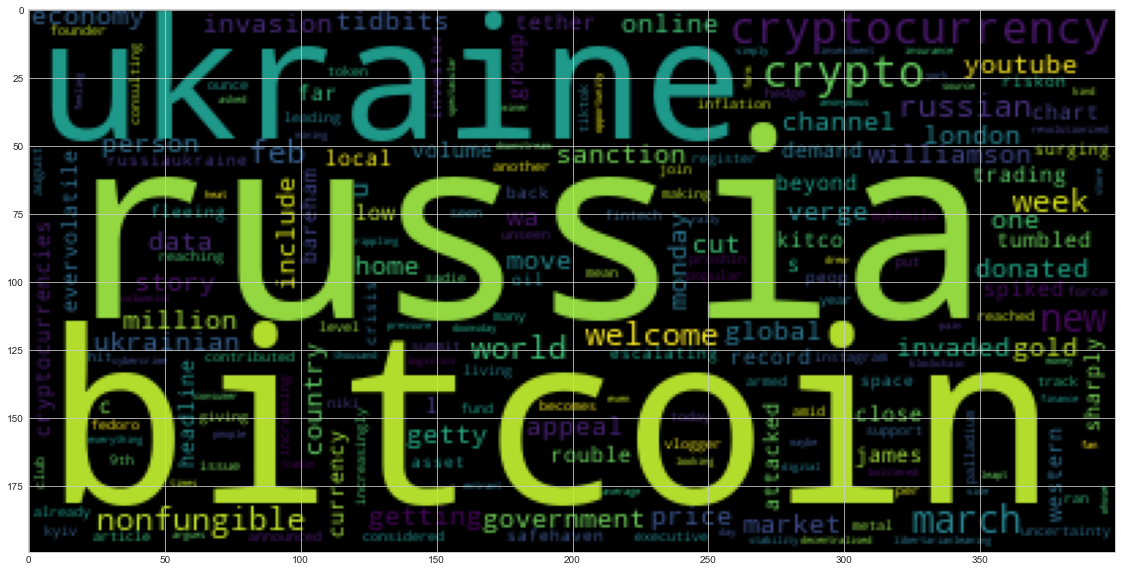

In [26]:
# Generate the Bitcoin word cloud
btc_words = ' '.join(btc_tokens_list)
wc = WordCloud().generate(btc_words)
plt.imshow(wc)

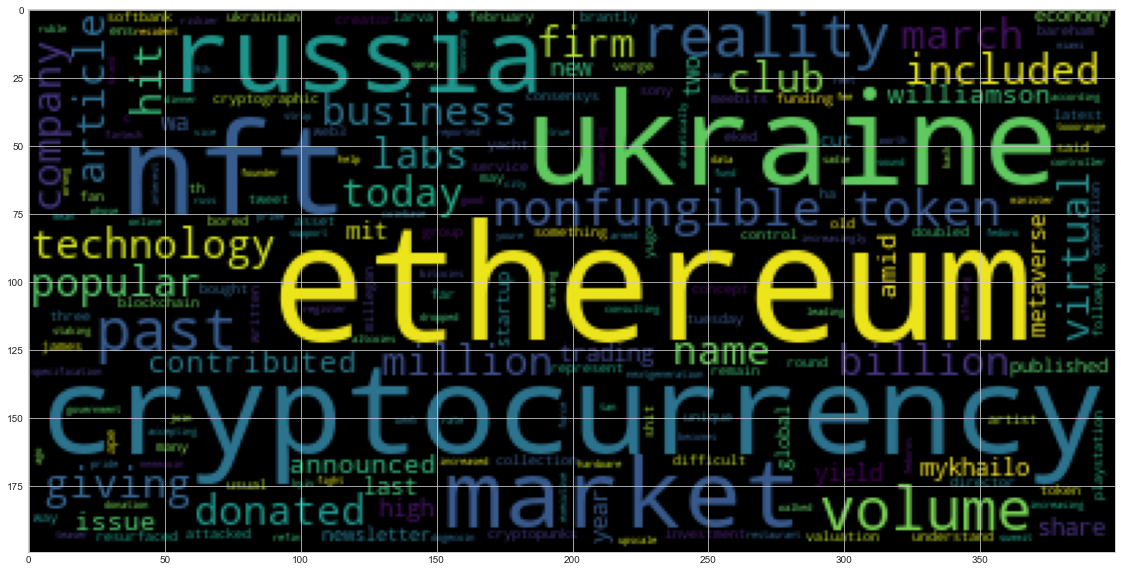

In [27]:
# Generate the Ethereum word cloud
eth_words = ' '.join(eth_tokens_list)
wc = WordCloud().generate(eth_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 3.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
btc_tokens_text = df_btc['text'].sum()
btc_tokens_text

'LONDON, Feb 28 (Reuters) - Trading volumes between the Russian rouble and the Tether cryptocurrency spiked sharply on Monday as the local currency tumbled to a record low on Western sanctions, data s… [+1745 chars]LONDON, March 4 (Reuters) - Cryptocurrencies have been close to the headlines since Russia invaded Ukraine, with the ever-volatile bitcoin in demand in Russia and beyond.\r\nHere are some charts that l… [+3634 chars]Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in cryptocurrency has been donated to Ukrainian groups since Russia attacked the c… [+7442 chars](Kitco News) The escalating Russia-Ukraine crisis, new sanctions, and surging oil prices have investors fleeing risk-on assets. And the crypto space is getting its safe-haven appeal back as more peop… [+3790 chars]The uncertainty of the market has put gold on track to hit $2,000 per ounce on Monday, reaching levels unseen since August 2020. Pallad

In [32]:
# Run the NER processor on all of the text
all_text = nlp(btc_tokens_text)
displacy.render(all_text, style='ent')

# Add a title to the document
all_text.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(all_text, style='ent')

In [34]:
# List all Entities
for ent in all_text.ents:
    print(f"{ent.text} | {ent.label_}")

LONDON | GPE
Feb 28 | DATE
Reuters | ORG
Russian | NORP
Tether | ORG
Monday | DATE
March 4 | DATE
Reuters | ORG
Russia | GPE
Ukraine | GPE
Russia | GPE
James Bareham | PERSON
More than $15 million | MONEY
More than $15 million | MONEY
Ukrainian | GPE
Russia | GPE
Russia | GPE
Ukraine | GPE
2,000 | MONEY
Monday | DATE
August 2020 | DATE
Palladium | ORG
today | DATE
the Data Summit | ORG
March 9th | DATE
Sadie Williamson | PERSON
Williamson Fintech Consulting | ORG
Russia | GPE
Ukraine | GPE
Niki Proshin | PERSON
a year | DATE
YouTube | ORG
TikTok | ORG
Instagram | ORG
Russian | NORP
Kyiv | GPE
Mykhailo Fedoro | PERSON
the New York Times | ORG
22 | CARDINAL
Reuters | ORG
2021 | DATE
thousands | CARDINAL
Reuters | ORG
Russia | GPE
Ukraine | GPE
one day | DATE
One | CARDINAL
Satoshi Nakamoto | PERSON
2008 | DATE
Nonfungible Tidbits | PERSON
this week | DATE
Russia | GPE
Ukraine | GPE
Ukrainians | NORP
Russian | NORP
+3275 | ORG
this week | DATE
Getty
Welcome to | ORG
Nonfungible Tidbits | 

---

### Ethereum NER

In [38]:
# Run the NER processor on all of the text
eth_tokens_text = df_eth['text'].sum()

all_text = nlp(eth_tokens_text)
displacy.render(all_text, style='ent')

# Add a title to the document
all_text.user_data["title"] = "Ethereum NER"

In [39]:
# Render the visualization
displacy.render(all_text, style='ent')

In [40]:
# List all Entities
for ent in all_text.ents:
    print(f"{ent.text} | {ent.label_}")

James Bareham | PERSON
More than $15 million | MONEY
More than $15 million | MONEY
Ukrainian | GPE
Russia | GPE
15 | CARDINAL
Reuters | ORG
ConsenSys | ORG
Tuesday | DATE
over $7 billion | MONEY
SoftBank | ORG
Ape Yacht | PERSON
Yugo Labs | PERSON
CryptoPunks | ORG
Larva Labs | PERSON
over three | CARDINAL
February | DATE
Ethereum Name Service | ORG
ENS | ORG
May 201 | DATE
the PlayStation 5 | PRODUCT
Sony | ORG
today | DATE
the Data Summit | ORG
March 9th | DATE
Sadie Williamson | PERSON
Williamson Fintech Consulting | ORG
Kyiv | GPE
Mykhailo Fedoro | PERSON
more than rubles | MONEY
Ukraine | GPE
Mykhailo Fedorov | PERSON
today | DATE
Ukraine | GPE
Russ | ORG
last year | DATE
Between 2020 and 2021 | DATE
weeks ago | DATE
Miami | GPE
two | CARDINAL
2022 | DATE
Facebook | ORG
Microsoft | ORG
chars]The Massachusetts Institute of Technology | ORG
MIT | ORG
2022 | DATE
Ethereum | ORG
MIT | ORG
+3186 | ORG
GeForce | ORG
GPU | ORG
DApps | ORG
NFT | ORG
Cut Off From Global Economy | WORK_OF_A

---